### This is the iteration script of randomely selecting the harvesting style

**It generates initial solution as before. Then from the initial solution, it just changes the harvesting style slection in each iteration and generates new result based on that. Harvesting styles are selected randomely**

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import random

In [2]:
#Defining all parameters and variables

s = list(range(0,30))
p = list(range(0,6))
l = list(range(0,3))

Qspl = []  #Qspl[s][p][l]  #Quantity

#creating 30x6x3 list with 0 values
for i in range(len(s)):
    temp_p = []
    for j in range(len(p)):
        temp_l = [0]*len(l)
        temp_p.append(temp_l)
    Qspl.append(temp_p)
            
#creating 30x1
Ys = [0]*len(s)  #Supplier selection binary variable, 0 or 1

Zsl = []   #l selection by supplier binary variable, 0 or 1
for i in range(len(s)):
    temp_s = [0]*len(l)
    Zsl.append(temp_s)

FCs = []
CSl = np.array([8.46, 30.16, 7.14])
CNFl = np.array([7.67, 8.08, 8.6])
CPFl = np.array([5.22, 4.09, 4.11])
CKFl = np.array([5.04, 6.35, 5.16])
CHl = np.array([4.31, 5.72, 3.15])
CPl = np.array([0.19, 0.41, 0.19])
CMl = np.array([9.4, 6.14, 5.46])
CSPl = np.array([4.07, 3.21, 2.76])
COl = np.array([7.79, 6.23, 6.84])
CONSl = np.array([1.66, 2.59, 1.44]) 
CONNFl = np.array([10.2, 10.8, 11.6])
CONPFl = np.array([5.93, 4.55, 5.0])
CONKFl = np.array([7.69, 10.18, 8])
CONHl = np.array([0.02, 0.13, 0.06])
CONPl = np.array([0.001, 0.001, 0.001])
CONMl = np.array([1.17, 0.61, 1.01])
CONSPl = np.array([0.26, 0.19, 0.32])
CONOl = np.array([6.88, 4.39, 6.22])
CLAB = 12.85
CF = 4.18
AEF = 9.817
WT = 25

Dsp = []
for i in range(len(s)):
    Dsp.append([])
    
CEHl = np.array([184.8, 178, 189.8])
CEF = 0.048
CAPs = []
DEMp = np.array([660435, 660435, 1320870, 584231, 1524080, 1371672])

In [3]:
#Reading parameter values

#capacity
capacity = pd.read_excel('/Users/zaidur/Documents/MOO_Corn/capacity.xlsx')
CAPs = list(capacity[" corn Production  ton"]) #capacities

#distance
distance = pd.read_excel('/Users/zaidur/Documents/MOO_Corn/Distance.xlsx')
distance = distance.drop('Plant', axis=1)
for i in range(len(s)):
    for j in range(len(p)):
        Dsp[i].append(distance.iloc[i,j])
Dsp = np.array(Dsp)

#fixed cost
fixed_cost = pd.read_excel('/Users/zaidur/Documents/MOO_Corn/Fixed cost.xlsx')
FCs = list(fixed_cost['Fixed cost'])
FCs = np.array(FCs)

In [4]:
#generating initial solution of the variables

CAPs_copy = CAPs.copy()
DEMp_copy = DEMp.copy()
for plant in range(len(p)):
    distance = distance.sort_values(distance.columns[plant]) #sort the plant column by minimum distance
    quant = 0
    index = 0
    remaining_demand = DEMp[plant]
    while quant < DEMp[plant]:
        supplier = distance.index[index]
        if CAPs[supplier] >= remaining_demand:  #if capacity is larger than demand
            quant = quant + remaining_demand
            
            #assign the decision variables Qspl, Zsl, Ys
            chosen_l = random.choice([0, 1, 2])   #randomely choose one of the three harvesting style or l to be 1
            #Qspl[supplier][plant].append(remaining_demand)
            Qspl[supplier][plant][chosen_l] = remaining_demand
            if 1 not in Zsl[supplier]:    
                Zsl[supplier][chosen_l] = 1
            Ys[supplier] = 1
            
            CAPs[supplier] = CAPs[supplier] - remaining_demand
            remaining_demand = DEMp[plant] - quant
            
        else:
            quant = quant + CAPs[supplier]
            
            #Qspl[supplier][plant].append(CAPs[supplier])
            #assign the decision variables Qspl, Zsl, Ys
            chosen_l = random.choice([0, 1, 2])   #randomely choose one of the three harvesting style or l to be 1
            #Qspl[supplier][plant].append(remaining_demand)
            Qspl[supplier][plant][chosen_l] = CAPs[supplier]
            if 1 not in Zsl[supplier]:
                Zsl[supplier][chosen_l] = 1
            Ys[supplier] = 1
            
            remaining_demand = DEMp[plant] - quant
            index = index + 1
            CAPs[supplier] = 0

Qspl = np.array(Qspl)
Ys = np.array(Ys)
Zsl = np.array(Zsl)

In [12]:
#Run the function defining cells

In [8]:
#Initial objective function calculation

w1 = random.uniform(0, 1) #randomly generated weights
w2 = 1 - w1

harvestCost = get_harvestCost(Qspl)
TransportCost = get_TransportCost(Qspl)

obj1 = harvestCost+TransportCost  #Objective Function 1
obj2 = get_obj2(Qspl)

obj_sum=w1*obj1+w2*obj2



In [9]:
"""
Iteration for random selection of harvesting style (l)

"""

from tqdm import tqdm
import time

obj1_list = []
obj2_list = []
obj_sum_list = []

# Make a copy of the original array
Qspl_copy = np.copy(Qspl)

Zsl_copy = np.zeros_like(Zsl)  # Assuming Zsl has shape (30, 3)

harvestCost = get_harvestCost(Qspl)


for itr in tqdm(range(10000), desc="Processing", unit="item"):
    
    # Randomly shuffle the selection of harvesting styles and create new Qspl_copy and Zsl_copy everytime
    for i in range(Qspl_copy.shape[0]):
        for j in range(Qspl_copy.shape[1]):
            np.random.shuffle(Qspl_copy[i, j])
    
    for i in range(Qspl_copy.shape[0]):
        for j in range(Qspl_copy.shape[1]):
            non_zero_position = np.where(Qspl_copy[i, j] != 0)[0]  # Get the position of non-zero element
            if non_zero_position.size > 0:  # If a non-zero element exists
                Zsl_copy[i, non_zero_position[0]] = 1
                
    new_harvestCost = get_harvestCost(Qspl_copy)
#     print("harvest cost for iteration - ", itr+1, new_harvestCost)
    
    #1st Accepting criteria of the random selection, new harvestCost has be between 80% and 120% of the old harvestCost
    if new_harvestCost> 0.8*harvestCost and new_harvestCost< 1.2*harvestCost:
        harvestCost = new_harvestCost
#         print("harvest cost changed for iteration - ", itr+1, harvestCost)
        TransportCost = get_TransportCost(Qspl_copy)
        
        obj2 = get_obj2(Qspl_copy)
        obj1 = harvestCost+TransportCost
        new_obj_sum=w1*obj1+w2*obj2
#         print("obj_sum for iteration - ", itr+1, new_obj_sum)
        
    
        #2nd Accepting criteria of the random selection, new objective function has to be better than the previous one
        if new_obj_sum < obj_sum:
            obj_sum = new_obj_sum
#             print("obj_sum changed for iteration - ", itr+1, obj_sum)
            
            #Store the obj1 and obj2
            obj1_list.append(obj1)
            obj2_list.append(obj2)
            obj_sum_list.append(obj_sum)
        else:
            continue
        
    else:
        continue

Processing: 100%|██████████████████████| 10000/10000 [00:43<00:00, 229.41item/s]


In [29]:
obj1_list

[]

In [30]:
obj2_list

[]

In [31]:
obj_sum_list

[]

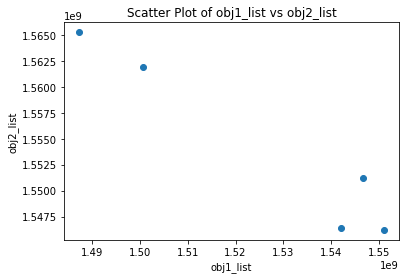

In [10]:
import matplotlib.pyplot as plt


# Create scatter plot
plt.scatter(obj1_list, obj2_list)

# Set labels and title
plt.xlabel('obj1_list')
plt.ylabel('obj2_list')
plt.title('Scatter Plot of obj1_list vs obj2_list')

# Display the plot
plt.show()


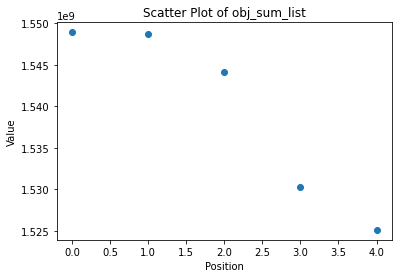

In [11]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(range(len(obj_sum_list)), obj_sum_list)

# Set labels and title
plt.xlabel('Position')
plt.ylabel('Value')
plt.title('Scatter Plot of obj_sum_list')

# Display the plot
plt.show()


In [5]:
"""
Function for getting the harvest cost with argument Qspl. All the other variables are global variables.

"""

def get_harvestCost(Qspl):
    #Getting the objective function value from generated variables and parameters

    ceHarvestingSum = 0   #Carbon emission harvesting, sum of CEHl * Qspl
    for supplier in Qspl:
        for plant in supplier:
            ceHarvestingSum = ceHarvestingSum + CEHl@plant

    transportSum = 0 #Carbon emission transportation, sum of DSp * Qspl
    for supplier in range(len(Qspl)):
        plant_ls = []
        for plant in Qspl[supplier]:
            sum_l = sum(plant)
            plant_ls.append(sum_l)
        plant_ls = np.array(plant_ls)
        transportSum = transportSum + Dsp[supplier]@plant_ls
    ceTransportSum = transportSum * CEF

    obj2=ceHarvestingSum+transportSum #objective Function 2

    FC=Ys@FCs #Fixed cost 

    cons1 = CSl * CONSl #cost for seedbeds
    csSum = 0
    for supplier in Qspl:
        for plant in supplier:
            csSum = csSum + cons1@plant


    cons2 = CNFl * CONNFl #cost for N fertilizer
    cnfSum = 0
    for supplier in Qspl:
        for plant in supplier:
            cnfSum = cnfSum + cons2@plant


    cons3 = CPFl * CONPFl #cost for P fertilizer
    cpfSum = 0
    for supplier in Qspl:
        for plant in supplier:
            cpfSum = cpfSum + cons3@plant


    cons4 = CKFl * CONKFl #cost for K fertilizer
    ckfSum = 0
    for supplier in Qspl:
        for plant in supplier:
            ckfSum = ckfSum + cons4@plant


    cons5 = CHl * CONHl # cost for herbicides
    chSum = 0
    for supplier in Qspl:
        for plant in supplier:
            chSum = chSum + cons5@plant


    cons6 = CPl * CONPl #cost for pesticides
    cpSum = 0
    for supplier in Qspl:
        for plant in supplier:
            cpSum = cpSum + cons6@plant


    cons7 = CMl * CONMl #cost for machinaries
    cmSum = 0
    for supplier in Qspl:
        for plant in supplier:
            cmSum = cmSum + cons7@plant


    cons8 = CSPl * CONSPl #cost for spare parts
    cspSum = 0
    for supplier in Qspl:
        for plant in supplier:
            cspSum = cspSum + cons8@plant


    cons9 = COl * CONOl #cost for oil
    coSum = 0
    for supplier in Qspl:
        for plant in supplier:
            coSum = coSum + cons9@plant


            qsplSum = 0 #labour cost
    for supplier in Qspl:
        for plant in supplier:
            qsplSum = qsplSum + sum(plant)
    clabSum = CLAB * qsplSum


    harvestCost=FC+csSum+cnfSum+cpfSum+ckfSum+chSum+cpSum+cmSum+cspSum+coSum+clabSum #Harvesting cost
    
    return harvestCost

In [6]:
"""
Function for getting the TransportCost with argument Qspl. All the other variables are global variables.

"""

def get_TransportCost(Qspl):
    
    transportSum = 0 #Carbon emission transportation, sum of DSp * Qspl
    for supplier in range(len(Qspl)):
        plant_ls = []
        for plant in Qspl[supplier]:
            sum_l = sum(plant)
            plant_ls.append(sum_l)
        plant_ls = np.array(plant_ls)
        transportSum = transportSum + Dsp[supplier]@plant_ls
    
    transportCost = (transportSum*CF)/(AEF*WT) #transportation cost
    
    return transportCost

In [7]:
"""
Function for getting the obj2 with argument Qspl. All the other variables are global variables.

"""

def get_obj2(Qspl):
    ceHarvestingSum = 0   #Carbon emission harvesting, sum of CEHl * Qspl
    for supplier in Qspl:
        for plant in supplier:
            ceHarvestingSum = ceHarvestingSum + CEHl@plant

    transportSum = 0 #Carbon emission transportation, sum of DSp * Qspl
    for supplier in range(len(Qspl)):
        plant_ls = []
        for plant in Qspl[supplier]:
            sum_l = sum(plant)
            plant_ls.append(sum_l)
        plant_ls = np.array(plant_ls)
        transportSum = transportSum + Dsp[supplier]@plant_ls
    ceTransportSum = transportSum * CEF

    obj2=ceHarvestingSum+transportSum #objective Function 2
    
    return obj2